In [66]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [67]:
df = pd.read_csv("student_performance_prediction.csv")
print(df.head())

  Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0     S00001                  12.5              NaN             75.0   
1     S00002                   9.3             95.3             60.6   
2     S00003                  13.2              NaN             64.0   
3     S00004                  17.6             76.8             62.4   
4     S00005                   8.8             89.3             72.7   

  Participation in Extracurricular Activities Parent Education Level Passed  
0                                         Yes                 Master    Yes  
1                                          No            High School     No  
2                                          No              Associate     No  
3                                         Yes               Bachelor     No  
4                                          No                 Master     No  


In [68]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [69]:
df = df.drop(columns=["Student ID"], axis=1)
print(df.shape)

(29446, 6)


In [70]:
print(df.describe())

       Study Hours per Week  Attendance Rate  Previous Grades
count          29446.000000     29446.000000     29446.000000
mean               9.964953        75.308582        65.412986
std                5.025682        20.399216        16.591152
min               -9.200000       -14.300000         8.300000
25%                6.600000        61.600000        54.900000
50%               10.000000        75.300000        65.200000
75%               13.400000        88.800000        75.200000
max               32.400000       150.200000       200.000000


In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29446 entries, 1 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         29446 non-null  float64
 1   Attendance Rate                              29446 non-null  float64
 2   Previous Grades                              29446 non-null  float64
 3   Participation in Extracurricular Activities  29446 non-null  object 
 4   Parent Education Level                       29446 non-null  object 
 5   Passed                                       29446 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.6+ MB
None


## Changing parent education level column to categorical then to numerical

In [72]:
df['Parent Education Level'] = df['Parent Education Level'].astype('category')
print(df['Parent Education Level'].dtype)
print(df['Parent Education Level'].cat.categories)

category
Index(['Associate', 'Bachelor', 'Doctorate', 'High School', 'Master'], dtype='object')


In [73]:
df['Parent Education Level'] = df['Parent Education Level'].cat.set_categories(
  new_categories=['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'],
  ordered=True
)
print(df['Parent Education Level'].cat.categories)

Index(['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'], dtype='object')


In [74]:
print(df['Parent Education Level'].value_counts())
df['Parent Education Level'] = df['Parent Education Level'].cat.codes
print(df['Parent Education Level'].value_counts())

Parent Education Level
Bachelor       5948
Associate      5928
Doctorate      5914
High School    5907
Master         5749
Name: count, dtype: int64
Parent Education Level
2    5948
1    5928
4    5914
0    5907
3    5749
Name: count, dtype: int64


In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29446 entries, 1 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         29446 non-null  float64
 1   Attendance Rate                              29446 non-null  float64
 2   Previous Grades                              29446 non-null  float64
 3   Participation in Extracurricular Activities  29446 non-null  object 
 4   Parent Education Level                       29446 non-null  int8   
 5   Passed                                       29446 non-null  object 
dtypes: float64(3), int8(1), object(2)
memory usage: 1.4+ MB
None


In [76]:
print(df.describe())

       Study Hours per Week  Attendance Rate  Previous Grades  \
count          29446.000000     29446.000000     29446.000000   
mean               9.964953        75.308582        65.412986   
std                5.025682        20.399216        16.591152   
min               -9.200000       -14.300000         8.300000   
25%                6.600000        61.600000        54.900000   
50%               10.000000        75.300000        65.200000   
75%               13.400000        88.800000        75.200000   
max               32.400000       150.200000       200.000000   

       Parent Education Level  
count            29446.000000  
mean                 1.994397  
std                  1.415055  
min                  0.000000  
25%                  1.000000  
50%                  2.000000  
75%                  3.000000  
max                  4.000000  


## Correcting negative values in 'Study Hours per Week' and 'Attendance Rate' columns

In [77]:
df['Study Hours per Week'] = np.abs(df['Study Hours per Week'])
df['Attendance Rate'] = np.abs(df['Attendance Rate'])
print(df.describe())

       Study Hours per Week  Attendance Rate  Previous Grades  \
count          29446.000000     29446.000000     29446.000000   
mean              10.058534        75.310456        65.412986   
std                4.835658        20.392294        16.591152   
min                0.000000         0.500000         8.300000   
25%                6.600000        61.600000        54.900000   
50%               10.000000        75.300000        65.200000   
75%               13.400000        88.800000        75.200000   
max               32.400000       150.200000       200.000000   

       Parent Education Level  
count            29446.000000  
mean                 1.994397  
std                  1.415055  
min                  0.000000  
25%                  1.000000  
50%                  2.000000  
75%                  3.000000  
max                  4.000000  


## changing 'Participated in Extracurricular Activities' column to numerical

In [78]:
df['Participation in Extracurricular Activities'] = df['Participation in Extracurricular Activities'].astype('category')
df['Participation in Extracurricular Activities'] = df['Participation in Extracurricular Activities'].cat.set_categories(
  new_categories=['No', 'Yes'],
  ordered=True
)
print(df['Participation in Extracurricular Activities'].cat.categories)

Index(['No', 'Yes'], dtype='object')


In [79]:
df['Participation in Extracurricular Activities'] = df['Participation in Extracurricular Activities'].cat.codes
print(df['Participation in Extracurricular Activities'].value_counts())

Participation in Extracurricular Activities
0    14739
1    14707
Name: count, dtype: int64


In [81]:
print(df.describe())
print(df.info())

       Study Hours per Week  Attendance Rate  Previous Grades  \
count          29446.000000     29446.000000     29446.000000   
mean              10.058534        75.310456        65.412986   
std                4.835658        20.392294        16.591152   
min                0.000000         0.500000         8.300000   
25%                6.600000        61.600000        54.900000   
50%               10.000000        75.300000        65.200000   
75%               13.400000        88.800000        75.200000   
max               32.400000       150.200000       200.000000   

       Participation in Extracurricular Activities  Parent Education Level  
count                                 29446.000000            29446.000000  
mean                                      0.499457                1.994397  
std                                       0.500008                1.415055  
min                                       0.000000                0.000000  
25%                          

## Changing 'Passed' column to numerical

In [ ]:
df['Passed'] = df['Passed'].astype('category')
df['Passed'] = df['Passed'].cat.set_categories(
  new_categories=['No', 'Yes'],
  ordered=True
)
df['Passed'] = df['Passed'].cat.codes
print(df['Passed'].value_counts())

Passed
0    14756
1    14690
Name: count, dtype: int64


## Splitting the dataset into features and target variable

In [83]:
X = df.drop(columns=['Passed'])
y = df['Passed']
print(X.shape)
print(y.shape)

(29446, 5)
(29446,)


## Splitting the dataset into training and testing sets

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23556, 5)
(5890, 5)
(23556,)
(5890,)


## Training the model

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5059422750424448
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54      2928
           1       0.51      0.43      0.47      2962

    accuracy                           0.51      5890
   macro avg       0.51      0.51      0.50      5890
weighted avg       0.51      0.51      0.50      5890

Confusion Matrix:
 [[1709 1219]
 [1691 1271]]


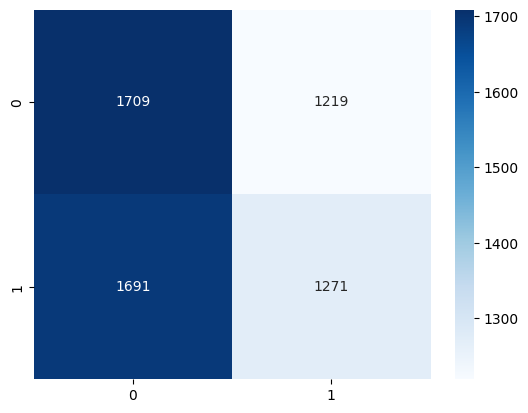

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [90]:
# plot the above data into 2D matrix and also plot the decision boundary
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(y.shape)

(29446, 2)
(29446,)


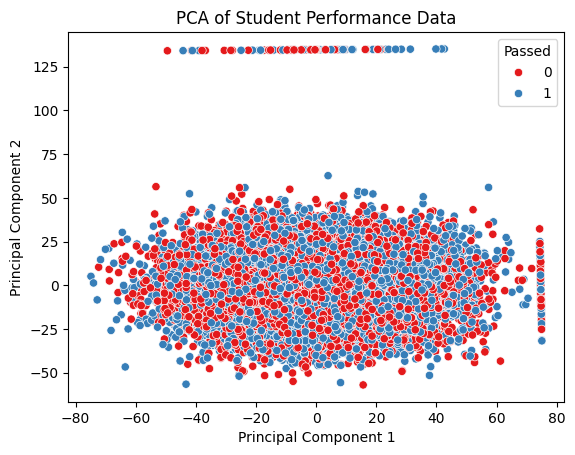

In [91]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('PCA of Student Performance Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()